In [ ]:
!pip install plotly

#3Dof IK

## kinematic 1

In [246]:
# function that take 3 angls in rad and transform them into deg
def rad2deg(rads):
  return [rads[0]*180/pi, rads[1]*180/pi, rads[2]*180/pi]
def deg2rad(deg):
  return deg*pi/180

In [247]:
def legIK(x,y,z):
  D = np.sqrt((z**2 + y**2) - coxa**2)
  G = np.sqrt(D**2 + x**2)
  tibia_angle = np.arccos((G**2 - femur**2 - tibia**2)/(-2*femur*tibia))
  femur_angle = np.arctan2(x,D) + np.arcsin((tibia * np.sin(tibia_angle)) / G)
  coxa_angle = np.arctan2(y,z) + np.arctan2(D,coxa)

  return rad2deg([coxa_angle, femur_angle, tibia_angle])


  '''
  if 0 < coxa_angle < deg2rad(200) and 0 < femur_angle < deg2rad(200) and 0 < tibia_angle < deg2rad(200):
    return [rad2deg([coxa_angle, femur_angle, tibia_angle])]
  else:
    return [rad2deg([0,0,0])] # <-------set home pose
  '''

In [248]:
def legIK_for_botzo(x,y,z):
  D = np.sqrt((z**2 + y**2) - coxa**2)
  G = np.sqrt(D**2 + x**2)
  knee_angle = np.arccos((G**2 - femur**2 - tibia**2)/(-2*femur*tibia))
  shoulder_angle = np.arctan2(x,D) + np.arcsin((tibia * np.sin(knee_angle)) / G)
  adjustment = np.arccos((real_femur**2 + femur**2 - dist_focuspoint_servo_femurtibia**2) / (2 * real_femur * femur))


  coxa_angle = np.arctan2(y,z) + np.arctan2(D,coxa)
  femur_angle = deg2rad(90) - (shoulder_angle + adjustment)
  tibia_angle = pi - knee_angle + adjustment + femur_angle

  return rad2deg([coxa_angle, femur_angle, tibia_angle])


  '''
  if 0 < coxa_angle < deg2rad(200) and 0 < femur_angle < deg2rad(200) and 0 < tibia_angle < deg2rad(200):
    return [rad2deg([coxa_angle, femur_angle, tibia_angle])]
  else:
    return [rad2deg([0,0,0])] # <-------set home pose
  '''

In [285]:
# in cm
coxa = 1.8 # from shoulder servo to the 2 other servos in the shoulder
femur = 9.5 # from top sevo to kneww
tibia = 9.8 # from knee to foot
real_femur = 9.1 # lenght of 3D printed femur
dist_focuspoint_servo_femurtibia = 2.8 # distance from focus point/pivot of the 2 servos in the shoulder
# target
x,y,z=-3,0,15

In [286]:
print(legIK_for_botzo(x,y,z))

[83.10789742065361, 45.4595489556731, 138.78331244583745]


## plot

In [237]:
from mpl_toolkits import mplot3d
import numpy as np
from math import *
import matplotlib.pyplot as plt

def setupView(limit):
    ax = plt.axes(projection="3d")
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    return ax

[169.6302401945226, 60.87349198180471, 61.26056695314204]


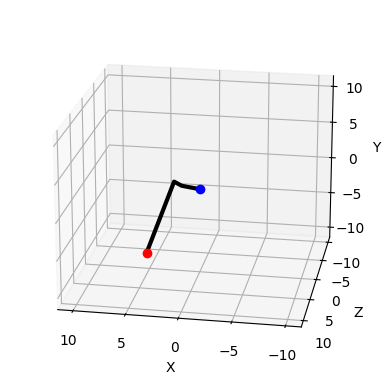

In [239]:
%matplotlib inline

setupView(11).view_init(elev=20., azim=100)

l1=coxa
l2=0
l3=femur
l4=tibia

x, y, z = 0, 10, 0

def calcLegPoints(angles):
    theta1,theta2,theta3=angles[0]
    theta23=theta2+theta3

    T0=np.array([0,0,0,1])
    T1=T0+np.array([-l1*cos(theta1),l1*sin(theta1),0,0])
    T2=T1+np.array([-l2*sin(theta1),-l2*cos(theta1),0,0])
    T3=T2+np.array([-l3*sin(theta1)*cos(theta2),-l3*cos(theta1)*cos(theta2),l3*sin(theta2),0])
    T4=T3+np.array([-l4*sin(theta1)*cos(theta23),-l4*cos(theta1)*cos(theta23),l4*sin(theta23),0])

    return np.array([T0,T1,T2,T3,T4])

def drawLegPoints(p):

    plt.plot([p[0][0],p[1][0],p[2][0],p[3][0],p[4][0]],
             [p[0][2],p[1][2],p[2][2],p[3][2],p[4][2]],
             [p[0][1],p[1][1],p[2][1],p[3][1],p[4][1]], 'k-', lw=3)
    plt.plot([p[0][0]],[p[0][2]],[p[0][1]],'bo',lw=2)
    plt.plot([p[4][0]],[p[4][2]],[p[4][1]],'ro',lw=2)
    plt.show()

angles = legIK(x,y,z)
print(angles)
angles_in_radians = [[np.radians(a) for a in angles]]
points = (calcLegPoints(angles_in_radians))
drawLegPoints(points)

## plot2

In [241]:
from mpl_toolkits import mplot3d
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Function to set up the 3D plot
def setupView(limit, ax):
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")

[173.9219949415032, 29.345520308109506, 122.290387081979]
[172.04116811845617, 49.15985821287294, 83.66982391297415]


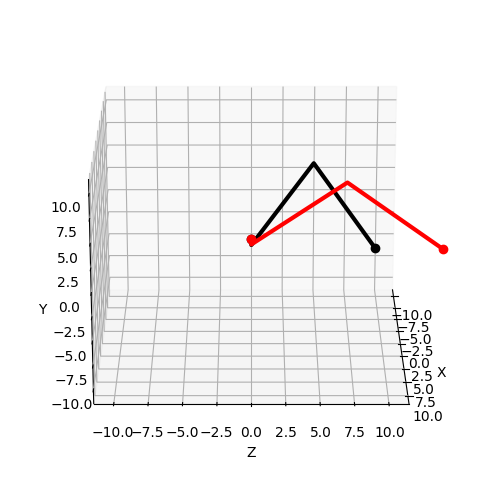

In [235]:
%matplotlib inline

l1 = coxa
l2 = 0
l3 = femur
l4 = tibia

# Function to calculate leg points in 3D space
def calcLegPoints(angles):
    theta1, theta2, theta3 = angles[0]
    theta23 = theta2 + theta3

    T0 = np.array([0, 0, 0, 1])
    T1 = T0 + np.array([-l1 * cos(theta1), l1 * sin(theta1), 0, 0])
    T2 = T1 + np.array([-l2 * sin(theta1), -l2 * cos(theta1), 0, 0])
    T3 = T2 + np.array([-l3 * sin(theta1) * cos(theta2), -l3 * cos(theta1) * cos(theta2), l3 * sin(theta2), 0])
    T4 = T3 + np.array([-l4 * sin(theta1) * cos(theta23), -l4 * cos(theta1) * cos(theta23), l4 * sin(theta23), 0])

    return np.array([T0, T1, T2, T3, T4])

# Function to draw the leg points in the 3D plot
def drawLegPoints(p, ax, color='k'):
    ax.plot([p[0][0], p[1][0], p[2][0], p[3][0], p[4][0]],
            [p[0][2], p[1][2], p[2][2], p[3][2], p[4][2]],
            [p[0][1], p[1][1], p[2][1], p[3][1], p[4][1]], f'{color}-', lw=3)
    ax.plot([p[0][0]], [p[0][2]], [p[0][1]], f'{color}o', lw=2)  # Start point (hip)
    ax.plot([p[4][0]], [p[4][2]], [p[4][1]], f'{color}o', lw=2)  # End point (foot)

# Define coordinates for the two legs
x1, y1, z1 = 0, 17, 0
x2, y2, z2 = 0, 13, 0

# Get leg angles
angles1 = legIK(x1, y1, z1)
angles2 = legIK(x2, y2, z2)
print(angles1)
print(angles2)

# Convert angles from degrees to radians
angles_in_radians1 = [[np.radians(a) for a in angles1]]
angles_in_radians2 = [[np.radians(a) for a in angles2]]

# Calculate leg points
points1 = calcLegPoints(angles_in_radians1)
points2 = calcLegPoints(angles_in_radians2)

# Create a single 3D plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Set up the view
setupView(11, ax)
ax.view_init(elev=20., azim=0)

# Draw both legs on the same plot, using different colors
drawLegPoints(points1, ax, color='k')  # First leg in black
drawLegPoints(points2, ax, color='r')  # Second leg in red

# Show the plot
plt.tight_layout()
plt.show()

[169.6302401945226, 60.87349198180471, 61.26056695314204]
[173.10789742065361, 40.24355015943445, 100.98162026161827]


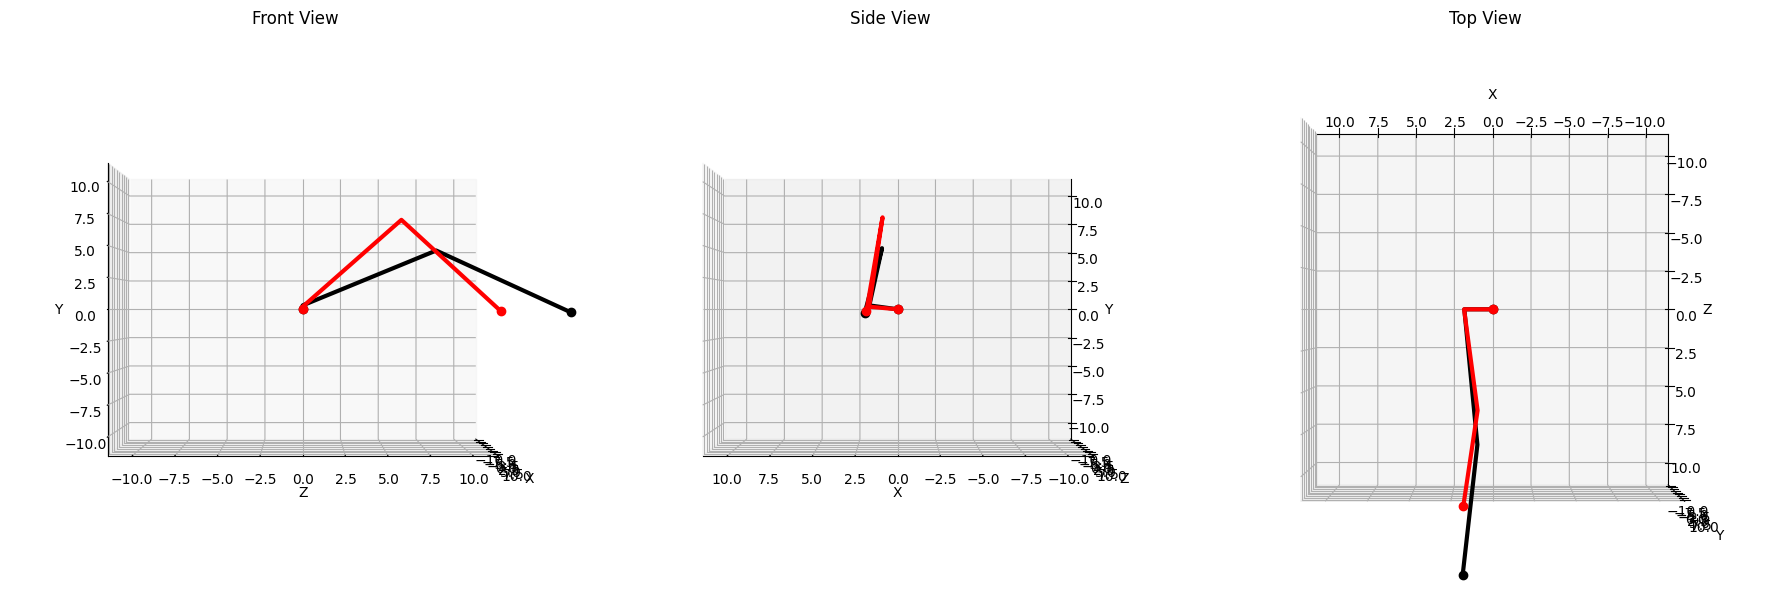

In [245]:
%matplotlib inline

l1 = coxa
l2 = 0
l3 = femur
l4 = tibia

# Function to calculate leg points in 3D space
def calcLegPoints(angles):
    theta1, theta2, theta3 = angles[0]
    theta23 = theta2 + theta3

    T0 = np.array([0, 0, 0, 1])
    T1 = T0 + np.array([-l1 * cos(theta1), l1 * sin(theta1), 0, 0])
    T2 = T1 + np.array([-l2 * sin(theta1), -l2 * cos(theta1), 0, 0])
    T3 = T2 + np.array([-l3 * sin(theta1) * cos(theta2), -l3 * cos(theta1) * cos(theta2), l3 * sin(theta2), 0])
    T4 = T3 + np.array([-l4 * sin(theta1) * cos(theta23), -l4 * cos(theta1) * cos(theta23), l4 * sin(theta23), 0])

    return np.array([T0, T1, T2, T3, T4])

# Function to draw the leg points in the 3D plot
def drawLegPoints(p, ax, color='k'):
    ax.plot([p[0][0], p[1][0], p[2][0], p[3][0], p[4][0]],
            [p[0][2], p[1][2], p[2][2], p[3][2], p[4][2]],
            [p[0][1], p[1][1], p[2][1], p[3][1], p[4][1]], f'{color}-', lw=3)
    ax.plot([p[0][0]], [p[0][2]], [p[0][1]], f'{color}o', lw=2)  # Start point (hip)
    ax.plot([p[4][0]], [p[4][2]], [p[4][1]], f'{color}o', lw=2)  # End point (foot)

# Define coordinates for the two legs
x1, y1, z1 = 0, 10, 0
x2, y2, z2 = 0, 15, 0

# Get leg angles
angles1 = legIK(x1, y1, z1)
angles2 = legIK(x2, y2, z2)
print(angles1)
print(angles2)

# Convert angles from degrees to radians
angles_in_radians1 = [[np.radians(a) for a in angles1]]
angles_in_radians2 = [[np.radians(a) for a in angles2]]

# Calculate leg points
points1 = calcLegPoints(angles_in_radians1)
points2 = calcLegPoints(angles_in_radians2)

# Create subplots for front, side, and top views
fig = plt.figure(figsize=(18, 6))

# Front view (looking along the X-axis)
ax1 = fig.add_subplot(131, projection='3d')
setupView(11, ax1)
ax1.view_init(elev=0, azim=0)  # Front view
drawLegPoints(points1, ax1, color='k')
drawLegPoints(points2, ax1, color='r')
ax1.set_title("Front View")

# Side view (looking along the Y-axis)
ax2 = fig.add_subplot(132, projection='3d')
setupView(11, ax2)
ax2.view_init(elev=0, azim=90)  # Side view
drawLegPoints(points1, ax2, color='k')
drawLegPoints(points2, ax2, color='r')
ax2.set_title("Side View")

# Top view (looking along the Z-axis)
ax3 = fig.add_subplot(133, projection='3d')
setupView(11, ax3)
ax3.view_init(elev=90, azim=90)  # Top view
drawLegPoints(points1, ax3, color='k')
drawLegPoints(points2, ax3, color='r')
ax3.set_title("Top View")

# Show the plots
plt.tight_layout()
plt.show()


[173.9219949415032, 29.345520308109506, 122.290387081979]
[172.04116811845617, 49.15985821287294, 83.66982391297415]


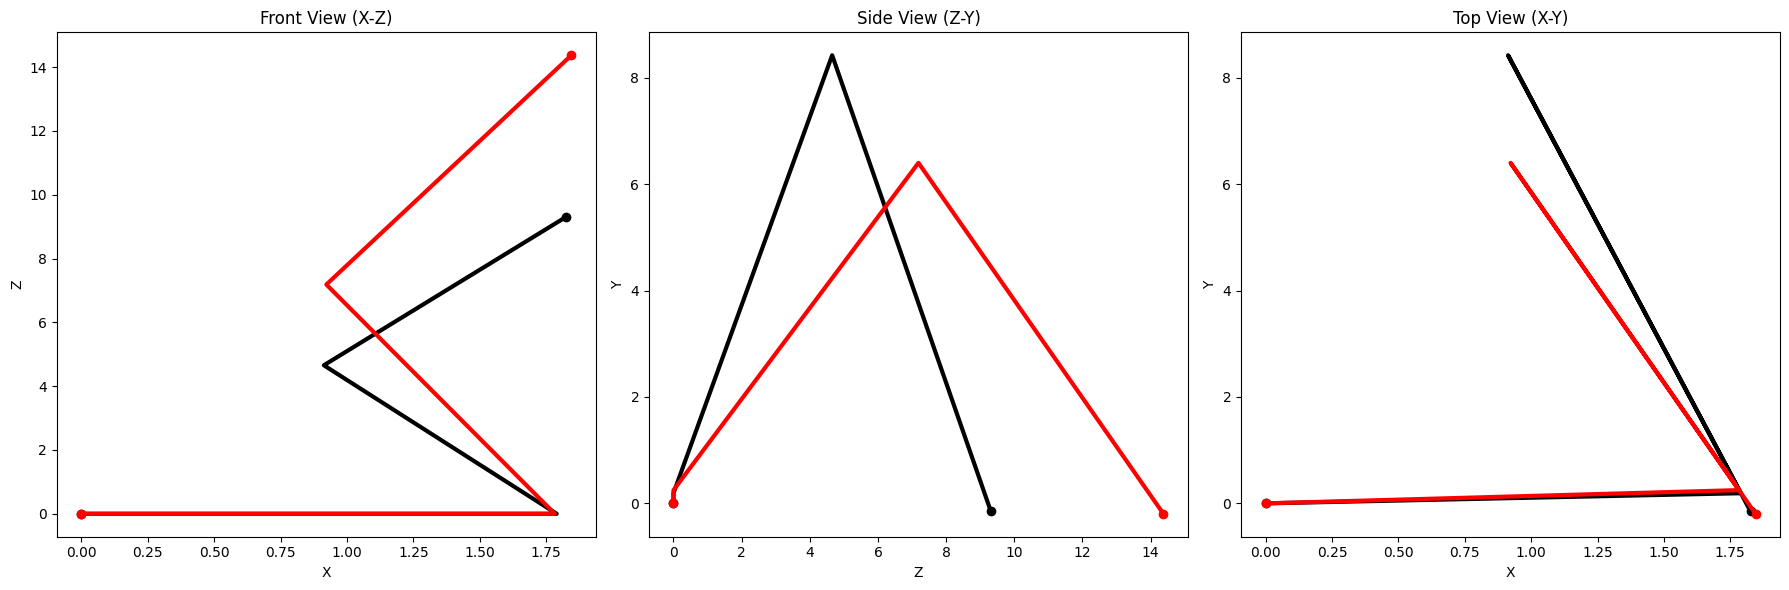

In [233]:
%matplotlib inline

l1 = coxa
l2 = 0
l3 = femur
l4 = tibia

# Function to calculate leg points in 3D space
def calcLegPoints(angles):
    theta1, theta2, theta3 = angles[0]
    theta23 = theta2 + theta3

    T0 = np.array([0, 0, 0, 1])
    T1 = T0 + np.array([-l1 * cos(theta1), l1 * sin(theta1), 0, 0])
    T2 = T1 + np.array([-l2 * sin(theta1), -l2 * cos(theta1), 0, 0])
    T3 = T2 + np.array([-l3 * sin(theta1) * cos(theta2), -l3 * cos(theta1) * cos(theta2), l3 * sin(theta2), 0])
    T4 = T3 + np.array([-l4 * sin(theta1) * cos(theta23), -l4 * cos(theta1) * cos(theta23), l4 * sin(theta23), 0])

    return np.array([T0, T1, T2, T3, T4])

# Function to draw the leg points in 2D plot (x-y or x-z or y-z)
def drawLegPoints2D(p, ax, view, color='k'):
    if view == 'front':  # X-Z plane
        ax.plot([p[0][0], p[1][0], p[2][0], p[3][0], p[4][0]],
                [p[0][2], p[1][2], p[2][2], p[3][2], p[4][2]], f'{color}-', lw=3)
        ax.plot([p[0][0]], [p[0][2]], f'{color}o', lw=2)  # Start point (hip)
        ax.plot([p[4][0]], [p[4][2]], f'{color}o', lw=2)  # End point (foot)
        ax.set_xlabel("X")
        ax.set_ylabel("Z")
    elif view == 'side':  # Z-Y plane
        ax.plot([p[0][2], p[1][2], p[2][2], p[3][2], p[4][2]],
                [p[0][1], p[1][1], p[2][1], p[3][1], p[4][1]], f'{color}-', lw=3)
        ax.plot([p[0][2]], [p[0][1]], f'{color}o', lw=2)  # Start point (hip)
        ax.plot([p[4][2]], [p[4][1]], f'{color}o', lw=2)  # End point (foot)
        ax.set_xlabel("Z")
        ax.set_ylabel("Y")
    elif view == 'top':  # X-Y plane
        ax.plot([p[0][0], p[1][0], p[2][0], p[3][0], p[4][0]],
                [p[0][1], p[1][1], p[2][1], p[3][1], p[4][1]], f'{color}-', lw=3)
        ax.plot([p[0][0]], [p[0][1]], f'{color}o', lw=2)  # Start point (hip)
        ax.plot([p[4][0]], [p[4][1]], f'{color}o', lw=2)  # End point (foot)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

# Define coordinates for the two legs
x1, y1, z1 = 0, 17, 0
x2, y2, z2 = 0, 13, 0

# Get leg angles
angles1 = legIK(x1, y1, z1)
angles2 = legIK(x2, y2, z2)
print(angles1)
print(angles2)

# Convert angles from degrees to radians
angles_in_radians1 = [[np.radians(a) for a in angles1]]
angles_in_radians2 = [[np.radians(a) for a in angles2]]

# Calculate leg points
points1 = calcLegPoints(angles_in_radians1)
points2 = calcLegPoints(angles_in_radians2)

# Create subplots for front, side, and top views
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Front view (X-Z plane)
drawLegPoints2D(points1, ax1, view='front', color='k')
drawLegPoints2D(points2, ax1, view='front', color='r')
ax1.set_title("Front View (X-Z)")

# Side view (Z-Y plane)
drawLegPoints2D(points1, ax2, view='side', color='k')
drawLegPoints2D(points2, ax2, view='side', color='r')
ax2.set_title("Side View (Z-Y)")

# Top view (X-Y plane)
drawLegPoints2D(points1, ax3, view='top', color='k')
drawLegPoints2D(points2, ax3, view='top', color='r')
ax3.set_title("Top View (X-Y)")

# Show the plots
plt.tight_layout()
plt.show()

##------------------------------------------------------

#Tests

##3Dof IK

In [ ]:
import numpy as np

def solve_ik(coord, coxa, femur, tibia):
    """ Solve for the joint angles of a single leg using IK equations """
    # Calculate D
    D = (coord[1]**2 + (-coord[2])**2 - coxa**2 - femur**2 - tibia**2 + (-coord[0])**2) / (2 * tibia * femur)

    '''
    D = checkdomain(D)  # Ensure D is in the valid domain [-1, 1]

    # Print D for debugging
    print(f"D value: {D}")
    '''

    # Calculate joint angles
    gamma = np.arctan2(-np.sqrt(1 - D**2), D)  # Knee angle
    tetta = -np.arctan2(coord[2], coord[1]) - np.arctan2(np.sqrt(coord[1]**2 + (-coord[2])**2 - coxa**2), -coxa)  # Hip angle
    alpha = np.arctan2(-coord[0], np.sqrt(coord[1]**2 + (-coord[2])**2 - coxa**2)) - np.arctan2(tibia * np.sin(gamma), femur + tibia * np.cos(gamma))  # Ankle angle

    # Print joint angles for debugging
    print(f"Calculated angles (radians) - Hip: {tetta}, Ankle: {alpha}, Knee: {gamma}")

    return np.array([-tetta, alpha, gamma])  # Return angles for hip, ankle, and knee

def checkdomain(D):
    """ Ensure that D remains within the valid domain for inverse kinematics [-1, 1] """
    if D > 1 or D < -1:
        print("____OUT OF DOMAIN____")
        return np.sign(D) * 0.99  # Normalize D to -0.99 or 0.99
    return D

def radians_to_degrees(radians):
    """ Convert radians to degrees """
    return radians * (180.0 / np.pi)

# ---------------------- Example Usage ----------------------
if __name__ == "__main__":
    # Leg segment lengths (in meters)
    coxa = 0.0 #1.8cm
    femur = 9.09
    tibia = 9.85

    # Target end-effector position (foot position) in meters
    target_position = np.array([0.0, 0.15, 0.0])  # Example position (x, y, z)

    # Solve inverse kinematics for the right leg
    joint_angles_rad = solve_ik(target_position, coxa, femur, tibia)

    # Convert joint angles from radians to degrees
    joint_angles_deg = radians_to_degrees(joint_angles_rad)

    # Output the joint angles in degrees
    print("Joint angles (Hip, Ankle, Knee) for the right leg in degrees:")
    print(joint_angles_deg)

____OUT OF DOMAIN____
D value: -0.99
Calculated angles (radians) - Hip: -1.5707963267948966, Ankle: 2.0151139872629282, Knee: -3.000053180265366
Joint angles (Hip, Ankle, Knee) for the right leg in degrees:
[  90.          115.45752671 -171.89038554]


## Test2 of IK

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np

# ---------------------- Utility Functions for Rotations ---------------------
# These functions handle rotation matrices around x, y, z axes

def Rx(roll):
    """ Rotation matrix around the x-axis (roll) """
    return np.matrix([[1,            0,             0, 0],
                      [0, np.cos(roll), -np.sin(roll), 0],
                      [0, np.sin(roll),  np.cos(roll), 0],
                      [0,            0,             0, 1]])

def Ry(pitch):
    """ Rotation matrix around the y-axis (pitch) """
    return np.matrix([[ np.cos(pitch), 0, np.sin(pitch), 0],
                      [             0, 1,             0, 0],
                      [-np.sin(pitch), 0, np.cos(pitch), 0],
                      [             0, 0,             0, 1]])

def Rz(yaw):
    """ Rotation matrix around the z-axis (yaw) """
    return np.matrix([[np.cos(yaw), -np.sin(yaw), 0, 0],
                      [np.sin(yaw),  np.cos(yaw), 0, 0],
                      [          0,            0, 1, 0],
                      [          0,            0, 0, 1]])

# Rotation matrix for all three (roll, pitch, yaw)
def Rxyz(roll, pitch, yaw):
    """ Combined rotation matrix for roll (x), pitch (y), and yaw (z) """
    if roll != 0. or pitch != 0. or yaw != 0.:
        return Rx(roll) * Ry(pitch) * Rz(yaw)
    else:
        return np.identity(4)  # Identity matrix if no rotation

# ---------------------- Transformations ---------------------
# Function to compute rotation + translation (4x4 transformation matrix)
def RTmatrix(orientation, position):
    """ Combines translation and rotation matrices for a rigid transformation """
    roll, pitch, yaw = orientation  # Robot's body orientation
    x0, y0, z0 = position           # Robot's body position

    # Translation matrix (4x4 homogeneous transformation)
    translation = np.matrix([[1, 0, 0, x0],
                             [0, 1, 0, y0],
                             [0, 0, 1, z0],
                             [0, 0, 0, 1]])

    # Rotation matrix (from roll, pitch, yaw)
    rotation = Rxyz(roll, pitch, yaw)

    # Combine the rotation and translation
    return rotation * translation

# Transform a coordinate based on a given rotation and translation
def transform(coord, rotation, translation):
    """ Apply a rigid transformation to a 3D coordinate """
    vector = np.array([[coord[0]], [coord[1]], [coord[2]], [1]])
    tranformVector = RTmatrix(rotation, translation) * vector
    return np.array([tranformVector[0,0], tranformVector[1,0], tranformVector[2,0]])

# ---------------------- Inverse Kinematics (IK) Solver ----------------------
# Inverse kinematics function for right leg (R)
def solve_R(coord, coxa, femur, tibia):
    """ Solve for the joint angles of the right leg using IK equations """
    # Calculate distances
    x, y, z = coord

    # Calculate D
    D = (x**2 + y**2 + (z - coxa)**2 - femur**2 - tibia**2) / (2 * femur * tibia)

    # Ensure D is in the valid domain [-1, 1]
    D = checkdomain(D)

    # Calculate the knee angle (gamma)
    gamma = np.arctan2(-np.sqrt(1 - D**2), D)  # Knee angle

    # Calculate the hip angle (tetta)
    r = np.sqrt(x**2 + y**2)  # Projection on XY plane
    tetta = np.arctan2(y, x) - np.arctan2((tibia * np.sin(gamma)), (femur + tibia * np.cos(gamma)))

    # Calculate the alpha angle (ankle angle)
    alpha = np.arctan2(z - coxa, r) - np.arctan2(tibia * np.sin(gamma), femur + tibia * np.cos(gamma))

    return np.array([-tetta, alpha, gamma])  # Return angles for hip, ankle, and knee

def solve_L(coord, coxa, femur, tibia):
    """ Solve for the joint angles of the left leg using IK equations """
    # The calculations will be similar, but you need to be cautious about the signs
    x, y, z = coord

    # Calculate D
    D = (x**2 + y**2 + (z - coxa)**2 - femur**2 - tibia**2) / (2 * femur * tibia)
    D = checkdomain(D)

    # Calculate the knee angle (gamma)
    gamma = np.arctan2(-np.sqrt(1 - D**2), D)  # Knee angle

    # Calculate the hip angle (tetta)
    r = np.sqrt(x**2 + y**2)  # Projection on XY plane
    tetta = np.arctan2(y, x) - np.arctan2((tibia * np.sin(gamma)), (femur + tibia * np.cos(gamma)))

    # Calculate the alpha angle (ankle angle)
    alpha = np.arctan2(z - coxa, r) - np.arctan2(tibia * np.sin(gamma), femur + tibia * np.cos(gamma))

    return np.array([-tetta, alpha, gamma])  # Return angles for hip, ankle, and knee

def checkdomain(D):
    """ Ensure that D remains within the valid domain for inverse kinematics [-1, 1] """
    if D > 1 or D < -1:
        print("____OUT OF DOMAIN____")
        D = 0.99 if D > 1 else -0.99
    return D

# ---------------------- Robot Kinematics Class ----------------------
class robotKinematics:
    def __init__(self):
        """ Initialization: Define the geometry of the robot """

        ### Update these values with your robot's measurements ###

        # Leg segment lengths (in meters)
        self.coxa = 0.018 #1.8cm  # Length of the coxa (shoulder/hip joint to femur)
        self.femur = 0.0909  # Length of the femur (thigh/knee joint)
        self.tibia = 0.0985  # Length of the tibia (knee to foot)

        # Body dimensions
        self.L = 0.193  # Length of the robot's body (distance between front and back legs)
        self.W = 0.077  # Width of the robot's body (distance between left and right legs)

        # Initial foot positions (distance from the body center to each foot)
        self.Ydist = 0.11  # Lateral distance from the body center to foot in Y direction
        self.Xdist = self.L  # Horizontal distance from the body center to foot in X direction
        self.height = 0.15  # Vertical height from body to the ground (foot height)

        # Body frame to foot frame vectors (initial positions)
        self.bodytoFR0 = np.array([self.L / 2, -self.W / 2, 0])
        self.bodytoFL0 = np.array([self.L / 2, self.W / 2, 0])
        self.bodytoBR0 = np.array([-self.L / 2, -self.W / 2, 0])
        self.bodytoBL0 = np.array([-self.L / 2, self.W / 2, 0])

        # Initial foot positions relative to the body center
        self.bodytoFR4 = np.array([self.Xdist / 2, -self.Ydist / 2, -self.height])
        self.bodytoFL4 = np.array([self.Xdist / 2, self.Ydist / 2, -self.height])
        self.bodytoBR4 = np.array([-self.Xdist / 2, -self.Ydist / 2, -self.height])
        self.bodytoBL4 = np.array([-self.Xdist / 2, self.Ydist / 2, -self.height])

    def solve(self, orn, pos, bodytoFeet):
        """ Solve inverse kinematics for all four legs """

        # Extract foot positions from the bodytoFeet matrix
        bodytoFR4 = np.asarray([bodytoFeet[0, 0], bodytoFeet[0, 1], bodytoFeet[0, 2]])
        bodytoFL4 = np.asarray([bodytoFeet[1, 0], bodytoFeet[1, 1], bodytoFeet[1, 2]])
        bodytoBR4 = np.asarray([bodytoFeet[2, 0], bodytoFeet[2, 1], bodytoFeet[2, 2]])
        bodytoBL4 = np.asarray([bodytoFeet[3, 0], bodytoFeet[3, 1], bodytoFeet[3, 2]])

        # Solve IK for each leg (Right and Left)
        FR = solve_R(bodytoFR4, self.coxa, self.femur, self.tibia)
        FL = solve_L(bodytoFL4, self.coxa, self.femur, self.tibia)
        BR = solve_R(bodytoBR4, self.coxa, self.femur, self.tibia)
        BL = solve_L(bodytoBL4, self.coxa, self.femur, self.tibia)

        # Return joint angles for all four legs
        return np.concatenate([FR, FL, BR, BL])

    def update_foot_positions(self, new_foot_positions):
        """ Update foot positions based on external input (e.g. trajectory) """
        self.bodytoFR4 = new_foot_positions[0]  # Front right leg
        self.bodytoFL4 = new_foot_positions[1]  # Front left leg
        self.bodytoBR4 = new_foot_positions[2]  # Back right leg
        self.bodytoBL4 = new_foot_positions[3]  # Back left leg

# ---------------------- Example Usage ----------------------
if __name__ == "__main__":
    # Instantiate the kinematics solver
    kinematics = robotKinematics()

    # Example orientation (roll, pitch, yaw) and position (x, y, z)
    orientation = [0.0, 0.0, 0.0]  # No rotation
    position = [0.0, 0.0, 0.0]     # Body center at origin

    # Define custom foot positions for trajectory (you can adjust these values)
    new_foot_positions = [
        np.array([0.1, -0.05, -0.12]),  # Front right foot position (adjust x, y, z)
        np.array([0.1, 0.05, -0.12]),   # Front left foot position
        np.array([-0.1, -0.05, -0.12]), # Back right foot position
        np.array([-0.1, 0.05, -0.12])   # Back left foot position
    ]

    # Update foot positions based on trajectory or external input
    kinematics.update_foot_positions(new_foot_positions)

    # Define foot positions relative to the body
    bodytoFeet = np.array([
        kinematics.bodytoFR4,
        kinematics.bodytoFL4,
        kinematics.bodytoBR4,
        kinematics.bodytoBL4
    ])

    # Solve inverse kinematics to find joint angles for each leg
    joint_angles = kinematics.solve(orientation, position, bodytoFeet)

    # Output the joint angles
    print("Joint angles (Hip, Shoulder, Knee) for each leg:")
    print(radians_to_degrees(joint_angles[:3]))

    plot_leg_with_semicircles(radians_to_degrees(joint_angles[:3]), kinematics.coxa, kinematics.femur, kinematics.tibia, new_foot_positions[0])

Joint angles (Hip, Shoulder, Knee) for each leg:
[  5.36955903 -29.79116965 -40.68625473]


##Plot

In [ ]:
import numpy as np
from math import atan2, pi, sqrt, acos, sin, cos
import plotly.graph_objects as go

def plot_leg_with_semicircles(joint_angles, coxa, femur, tibia, target_position):
    """ Interactive 3D Plot of the leg with semicircles showing joint angles. """
    # Unpack joint angles
    hip_angle, ankle_angle, knee_angle = joint_angles

    # Convert angles to radians for calculations
    hip_angle_rad = np.radians(hip_angle)
    ankle_angle_rad = np.radians(ankle_angle)
    knee_angle_rad = np.radians(knee_angle)

    # Calculate joint positions
    # Base position of the hip
    hip_position = np.array([0, 0, 0])

    # Position of the knee
    knee_position = hip_position + np.array([
        coxa * np.cos(hip_angle_rad),
        coxa * np.sin(hip_angle_rad),
        0
    ])

    # Position of the ankle
    # The angle here is affected by both knee and hip angles
    knee_to_ankle_length = femur
    ankle_position = knee_position + np.array([
        knee_to_ankle_length * np.cos(hip_angle_rad) * np.cos(knee_angle_rad),
        knee_to_ankle_length * np.sin(hip_angle_rad) * np.cos(knee_angle_rad),
        knee_to_ankle_length * np.sin(knee_angle_rad)  # This adds the vertical component
    ])

    # Foot position (adding the tibia length)
    foot_position = ankle_position + np.array([
        tibia * np.cos(ankle_angle_rad) * np.cos(knee_angle_rad),
        tibia * np.sin(ankle_angle_rad) * np.cos(knee_angle_rad),
        tibia * np.sin(knee_angle_rad)  # Adding vertical component for foot position
    ])

    # Create a 3D scatter plot using Plotly
    fig = go.Figure()

    # Plot the segments: Hip to Knee, Knee to Ankle, Ankle to Foot
    fig.add_trace(go.Scatter3d(x=[hip_position[0], knee_position[0]],
                               y=[hip_position[1], knee_position[1]],
                               z=[hip_position[2], knee_position[2]],
                               mode='lines+markers',
                               name='Coxa',
                               line=dict(color='blue', width=6),
                               marker=dict(size=4)))

    fig.add_trace(go.Scatter3d(x=[knee_position[0], ankle_position[0]],
                               y=[knee_position[1], ankle_position[1]],
                               z=[knee_position[2], ankle_position[2]],
                               mode='lines+markers',
                               name='Femur',
                               line=dict(color='green', width=6),
                               marker=dict(size=4)))

    fig.add_trace(go.Scatter3d(x=[ankle_position[0], foot_position[0]],
                               y=[ankle_position[1], foot_position[1]],
                               z=[ankle_position[2], foot_position[2]],
                               mode='lines+markers',
                               name='Tibia',
                               line=dict(color='red', width=6),
                               marker=dict(size=4)))

    # Add labels for each point
    fig.add_trace(go.Scatter3d(x=[hip_position[0]], y=[hip_position[1]], z=[hip_position[2]],
                               mode='text', text=['Hip'], textposition='top center'))
    fig.add_trace(go.Scatter3d(x=[knee_position[0]], y=[knee_position[1]], z=[knee_position[2]],
                               mode='text', text=['Knee'], textposition='top center'))
    fig.add_trace(go.Scatter3d(x=[ankle_position[0]], y=[ankle_position[1]], z=[ankle_position[2]],
                               mode='text', text=['Ankle'], textposition='top center'))
    fig.add_trace(go.Scatter3d(x=[foot_position[0]], y=[foot_position[1]], z=[foot_position[2]],
                               mode='text', text=['Foot'], textposition='top center'))

    # Plot the target position as an orange cross
    fig.add_trace(go.Scatter3d(x=[target_position[0]], y=[target_position[1]], z=[target_position[2]],
                               mode='markers',
                               marker=dict(size=8, color='orange', symbol='cross'),
                               name='Target Position'))

    # Add semicircles to visualize the joint angle planes
    semicircle_points = 100  # Number of points for semicircle
    angles = np.linspace(0, np.pi, semicircle_points)

    # Hip semicircle
    hip_semicircle_x = coxa * np.cos(angles)
    hip_semicircle_y = coxa * np.sin(angles)
    fig.add_trace(go.Scatter3d(x=hip_semicircle_x, y=hip_semicircle_y, z=np.zeros(semicircle_points),
                               mode='lines', line=dict(color='blue', dash='dash'),
                               name='Hip Angle Semicircle'))

    # Knee semicircle
    knee_semicircle_x = knee_position[0] + femur * np.cos(angles)
    knee_semicircle_y = knee_position[1] + femur * np.sin(angles)
    fig.add_trace(go.Scatter3d(x=knee_semicircle_x, y=knee_semicircle_y, z=np.zeros(semicircle_points),
                               mode='lines', line=dict(color='green', dash='dash'),
                               name='Knee Angle Semicircle'))

    # Ankle semicircle
    ankle_semicircle_x = ankle_position[0] + tibia * np.cos(angles)
    ankle_semicircle_y = ankle_position[1] + tibia * np.sin(angles)
    fig.add_trace(go.Scatter3d(x=ankle_semicircle_x, y=ankle_semicircle_y, z=np.zeros(semicircle_points),
                               mode='lines', line=dict(color='red', dash='dash'),
                               name='Ankle Angle Semicircle'))

    # Customize the layout for better visualization
    fig.update_layout(scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ))

    # Set view angle for better perspective
    fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)))

    # Show the interactive plot
    fig.show()

# ---------------------- Example Usage ----------------------
if __name__ == "__main__":
    # Leg segment lengths (in meters)
    coxa = 0.018
    femur = 0.0909
    tibia = 0.0985

    # Target end-effector position (foot position) in meters
    target_position = np.array([0.0, 0.0, -0.15])  # Example position (x, y, z)

    # Solve inverse kinematics for the right leg
    joint_angles_rad = solve_ik(target_position, coxa, femur, tibia)

    # Convert joint angles from radians to degrees
    joint_angles_deg = radians_to_degrees(joint_angles_rad)

    # Output the joint angles in degrees
    print("Joint angles (Hip, Ankle, Knee) for the right leg in degrees:")
    print(joint_angles_deg)

    # Plot the leg configuration interactively with semicircles and show the target position
    plot_leg_with_semicircles(joint_angles_deg, coxa, femur, tibia, target_position)

D value: 0.23515214465608986
Calculated angles (radians) - Hip: -0.12028988239478822, Ankle: 0.6982764020281, Knee: -1.3334212275683848
Joint angles (Hip, Ankle, Knee) for the right leg in degrees:
[  6.89210258  40.00829077 -76.39940865]


## Other tests

In [ ]:
import numpy as np
from math import atan, pi, radians, cos, sin, sqrt, acos
from numpy.linalg import norm

def RotMatrix3D(rotation=[0,0,0], is_radians=True, order='xyz'):
    roll, pitch, yaw = rotation[0], rotation[1], rotation[2]

    # Convert to radians if the input is in degrees
    if not is_radians:
        roll = radians(roll)
        pitch = radians(pitch)
        yaw = radians(yaw)

    # Rotation matrices around each axis
    rotX = np.matrix([[1, 0, 0], [0, cos(roll), -sin(roll)], [0, sin(roll), cos(roll)]])
    rotY = np.matrix([[cos(pitch), 0, sin(pitch)], [0, 1, 0], [-sin(pitch), 0, cos(pitch)]])
    rotZ = np.matrix([[cos(yaw), -sin(yaw), 0], [sin(yaw), cos(yaw), 0], [0, 0, 1]])

    # Rotation matrix order (default: pitch -> roll -> yaw)
    if order == 'xyz': rotationMatrix = rotZ * rotY * rotX
    elif order == 'xzy': rotationMatrix = rotY * rotZ * rotX
    elif order == 'yxz': rotationMatrix = rotZ * rotX * rotY
    elif order == 'yzx': rotationMatrix = rotX * rotZ * rotY
    elif order == 'zxy': rotationMatrix = rotY * rotX * rotZ
    elif order == 'zyx': rotationMatrix = rotX * rotY * rotZ

    return rotationMatrix

def point_to_rad(p1, p2):
    """ Converts 2D cartesian points to polar angles in range 0 - 2pi """
    if (p1 > 0 and p2 >= 0): return atan(p2 / p1)
    elif (p1 == 0 and p2 >= 0): return pi / 2
    elif (p1 < 0 and p2 >= 0): return atan(p2 / p1) + pi
    elif (p1 < 0 and p2 < 0): return atan(p2 / p1) + pi
    elif (p1 > 0 and p2 < 0): return 2 * pi + atan(p2 / p1)
    elif (p1 == 0 and p2 < 0): return 3 * pi / 2
    elif (p1 == 0 and p2 == 0): return 0  # Edge case

def solve_ik(coord, coxa, femur, tibia):
    """ Solve for the joint angles of a single leg using IK equations """
    x, y, z = coord

    # Step 1: Calculate the projection and the coxa angle (theta_1)
    len_A = sqrt(y**2 + z**2)  # Distance from the hip joint to the projection
    if len_A == 0:
        raise ValueError("The target position is aligned with the hip joint; invalid IK configuration.")

    a_2 = np.arcsin(coxa / len_A)  # Angle for coxa length projection
    a_1 = point_to_rad(coord[1], coord[2])
    theta_1 = a_1 - (np.pi / 2 - a_2)  # Adjusted coxa angle

    # Step 2: Calculate the position of the knee joint
    j2 = np.array([0, coxa * cos(theta_1), coxa * sin(theta_1)])
    j4 = np.array(coord)
    j4_2_vec = j4 - j2  # Vector from hip to ankle

    # Rotate to the 2D plane
    R = theta_1 - pi / 2
    rot_mtx = RotMatrix3D([-R, 0, 0], is_radians=True)
    j4_2_vec_ = rot_mtx * np.reshape(j4_2_vec, (3, 1))

    # Components in the rotated coordinate system
    x_, y_, z_ = j4_2_vec_[0], j4_2_vec_[1], j4_2_vec_[2]
    len_B = norm([x_, z_])

    # Step 3: Calculate knee and ankle angles
    b_1 = point_to_rad(x_, z_)
    b_2 = acos(np.clip((femur**2 + len_B**2 - tibia**2) / (2 * femur * len_B), -1, 1))
    b_3 = acos(np.clip((femur**2 + tibia**2 - len_B**2) / (2 * femur * tibia), -1, 1))

    theta_2 = b_1 - b_2
    theta_3 = pi - b_3

    return np.array([theta_1, theta_2, theta_3])

def radians_to_degrees(radians):
    """ Convert radians to degrees """
    return np.degrees(radians)

# ---------------------- Example Usage ----------------------
if __name__ == "__main__":
    # Leg segment lengths (in meters)
    coxa = 0.018
    femur = 0.0909
    tibia = 0.0985

    # Target end-effector position (foot position) in meters
    target_position = np.array([0.0, 0.0, 0.10])  # Example position (x, y, z)

    # Solve inverse kinematics for the right leg
    joint_angles_rad = solve_ik(target_position, coxa, femur, tibia)

    # Convert joint angles from radians to degrees
    joint_angles_deg = radians_to_degrees(joint_angles_rad)

    # Output the joint angles in degrees
    print("Joint angles (Hip, Ankle, Knee) for the right leg in degrees:")
    print(joint_angles_deg)


Joint angles (Hip, Ankle, Knee) for the right leg in degrees:
[ 10.36975981  90.         180.        ]


In [ ]:
def solve_ik(target_position, coxa, femur, tibia):
    """ Solve Inverse Kinematics for the leg to reach the target position. """

    # Unpack target position
    tx, ty, tz = target_position

    # Calculate the hip angle
    hip_angle = atan2(ty, tx)  # angle in radians
    d = sqrt(tx**2 + ty**2)  # horizontal distance to the target

    # Check if the target is reachable
    if d > (femur + tibia):
        raise ValueError("Target is unreachable")

    # Calculate the knee position
    # Project the target to the horizontal plane
    dz = tz  # Z height from ground level
    # Calculate angles using law of cosines
    knee_distance = sqrt(d**2 + dz**2)

    # Calculate the knee angle
    knee_angle = acos((femur**2 + knee_distance**2 - tibia**2) / (2 * femur * knee_distance))

    # Calculate the ankle angle
    ankle_angle = acos((femur**2 + tibia**2 - knee_distance**2) / (2 * femur * tibia))

    # Adjust angles based on orientation and sign
    knee_angle = pi - knee_angle  # Adjust for elbow-like joint
    ankle_angle = pi/2 - ankle_angle  # This assumes the angle goes towards the ground

    return np.array([np.degrees(hip_angle), np.degrees(ankle_angle), np.degrees(knee_angle)])
